# Analyse de contenu avec Python

Dans certains cas, vous voulez maîtriser toutes les étapes de l'analyse.

## Chargement des bibliothèques et des données

Les outils

In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

Et les données

In [3]:
data = pd.read_csv("../data/europresse_national_outarde.csv")
data.head()

,Date_raw,Titre_raw,Journal_raw,Contenu_raw,Auteur_raw,Date_mod,Titre_mod,Contenu_mod,Journal_mod
0,"\nSciences et éthique, mardi 4 mars 20...",\nENVIRONNEMENT. L'outarde canepetière et le T...,"\n La Croix, no. 39825","\n\nArmé de ses jumelles, Thomas Menut balaie ...",NaN,2014-03-04,ENVIRONNEMENT. L'outarde canepetière et le TGV...,"Armé de ses jumelles, Thomas Menut balaie du r...",La Croix
1,"\nHippisme, samedi 18 juillet 2015 422...",\n[1...]\n,\n Aujourd'hui en France ...,\n\n1 ARTISTE TIME59 M. Barzalona\n1p 1p 5p...,NaN,2015-07-18,[1...],1 ARTISTE TIME59 M. Barzalona\n1p 1p 5p 3p ...,Aujourd'hui en France
2,"\nInternational, mercredi 13 janvier 2...","\nEn Algérie, le ministre et les lingots d'or ...",\n Le Monde,"\n\nExpéditifs, les procès d'anciens dignitair...",NaN,2021-01-13,"En Algérie, le ministre et les lingots d'or de...","Expéditifs, les procès d'anciens dignitaires a...",Le Monde
3,"\nSOCIÉTÉ, samedi 9 octobre 1999 804 m...",\nL'outarde se refait une santé chez les céréa...,\n Libération,"\n\nVienne et Maine-et-Loire, envoyée spéciale...",NaN,1999-10-09,L'outarde se refait une santé chez les céréali...,"Vienne et Maine-et-Loire, envoyée spéciale. ...",Libération
4,"\nScience & techno, mercredi 17 décemb...",\nRendez-vous zoologie\nLa fausse outarde kam...,\n Le Monde,"\n\nFin novembre, dans le nord de l'Afghanista...",NaN,2014-12-17,Rendez-vous zoologie\nLa fausse outarde kamikaze,"Fin novembre, dans le nord de l'Afghanistan, d...",Le Monde


## Mise en forme

- ajouter une colonne qui correspond au nombre de mots
- filtrer uniquement les colonnes avec 2 fois outarde dedans

In [8]:
data["nb_mots"] = data["Contenu_mod"].apply(lambda x : len(x.split()))
data["nb_outarde"] = data["Contenu_mod"].apply(lambda x : x.lower().count("outarde"))
data_mod = data[data["nb_outarde"]>1]

## Faire des explorations/visualisations

<Axes: ylabel='Journal_mod'>

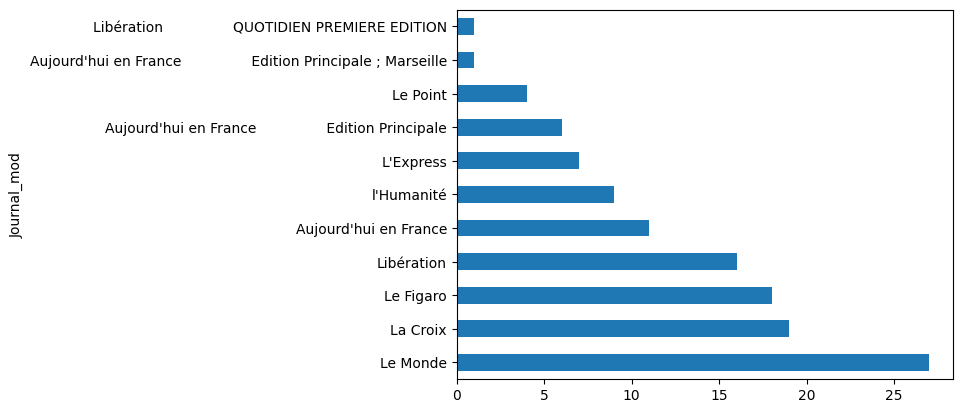

In [19]:
data["Journal_mod"].value_counts().plot(kind="barh")

<Axes: >

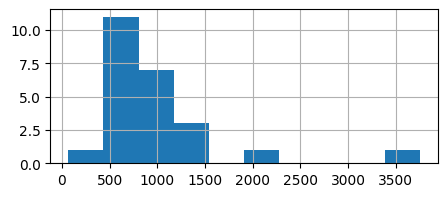

In [12]:
data_mod["nb_mots"].hist(bins=10,figsize=(5,2))

<Axes: >

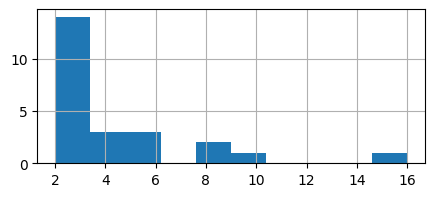

In [13]:
data_mod["nb_outarde"].hist(bins=10,figsize=(5,2))

In [14]:
data[data["nb_outarde"]>10]

,Date_raw,Titre_raw,Journal_raw,Contenu_raw,Auteur_raw,Date_mod,Titre_mod,Contenu_mod,Journal_mod,nb_mots,nb_outarde
3,"\nSOCIÉTÉ, samedi 9 octobre 1999 804 m...",\nL'outarde se refait une santé chez les céréa...,\n Libération,"\n\nVienne et Maine-et-Loire, envoyée spéciale...",NaN,1999-10-09,L'outarde se refait une santé chez les céréali...,"Vienne et Maine-et-Loire, envoyée spéciale. ...",Libération,1084,16


## Analyse plus poussée

Modèle de langage

In [20]:
nlp = spacy.load("fr_core_news_md")

Ne garder que les noms du texte

In [25]:
t = nlp("Ceci est une phrase")
for i in t:
    print(i,i.pos_)

Ceci PRON
est AUX
une DET
phrase NOUN


Créer une fonction qui filtre que les noms

In [45]:
def filtrer_noms(phrase):
    return [i.lemma_ for i in nlp(phrase) if i.pos_=="NOUN" and len(i)>3]

Appliquer au texte

In [46]:
data["noms"] = data["Contenu_mod"].apply(filtrer_noms)

In [47]:
le_monde = []
for t in list(data[data["Journal_mod"]=="Le Monde"]["noms"]):
    le_monde+=t
pd.Series(le_monde).value_counts()[0:20]

année         89
gène          69
espèce        68
chromosome    63
homme         60
étude         54
oiseau        54
temps         49
projet        39
terre         38
jour          38
million       38
monde         37
fois          34
heure         33
zone          33
recherche     32
pays          31
impact        30
nature        30
Name: count, dtype: int64

In [49]:
liberation = []
for t in list(data[data["Journal_mod"]=="Libération"]["noms"]):
    liberation+=t
pd.Series(liberation).value_counts()[0:20]

outarde         34
criquet         32
espèce          31
oiseau          29
terre           21
agriculteur     20
hectare         18
année           17
animal          16
nature          16
homme           14
programme       13
monde           13
site            13
population      12
fois            12
projet          12
insecte         11
conservation    11
21h05           11
Name: count, dtype: int64

Et aller plus loin ...